# Лабораторная работа 4: PCA через сингулярное разложение

## Задачи:
1. Выбрать датасет для линейной регрессии
2. Реализовать PCA через сингулярное разложение
3. Определить эффективную размерность выборки
4. Построить график для критерия крутого склона
5. Показать эквивалентность с эталонной реализацией


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from source.pca_svd import PCA_SVD
from source.visualization import plot_pca_comparison, plot_effective_dimension_analysis
from source.comparison import compare_with_sklearn
from sklearn.datasets import fetch_california_housing

# Настройка для отображения графиков
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## 1. Загрузка и подготовка датасета

In [2]:
from sklearn.preprocessing import MinMaxScaler

data = fetch_california_housing()
X = data.data
y = data.target
n_samples, n_features = X.shape

scaler = MinMaxScaler()  # нормализация
X_scaled = scaler.fit_transform(X)

print(f"Размерность данных: {X.shape}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Количество образцов: {X.shape[0]}")

print(f"\nПервые 5 строк нормализованных данных:")
print(X_scaled[:5])


Размерность данных: (20640, 8)
Количество признаков: 8
Количество образцов: 20640

Первые 5 строк нормализованных данных:
[[0.53966842 0.78431373 0.0435123  0.02046866 0.00894083 0.00149943
  0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 0.01892926 0.0672104  0.00114074
  0.565356   0.21215139]
 [0.46602805 1.         0.05275646 0.02194011 0.01381765 0.00169796
  0.5642933  0.21015936]
 [0.35469856 1.         0.03524099 0.02192864 0.01555537 0.0014933
  0.5642933  0.20916335]
 [0.23077613 1.         0.03853386 0.02216644 0.01575156 0.00119838
  0.5642933  0.20916335]]


## 2. Реализация PCA через сингулярное разложение

In [3]:
# Применяем нашу реализацию PCA через SVD
pca_svd = PCA_SVD()
X_pca_svd = pca_svd.fit_transform(X_scaled)

print("Реализация PCA через SVD:")
print(f"Форма преобразованных данных: {X_pca_svd.shape}")
print(f"Объясненная дисперсия: {pca_svd.explained_variance_}")
print(f"Отношение объясненной дисперсии: {pca_svd.explained_variance_ratio_}")
print(f"\nКумулятивная объясненная дисперсия:")
print(np.cumsum(pca_svd.explained_variance_ratio_))


Реализация PCA через SVD:
Форма преобразованных данных: (20640, 8)
Объясненная дисперсия: [8.86173929e-02 6.09133766e-02 1.71720523e-02 2.90258211e-03
 8.93213867e-04 4.07876107e-04 6.92775838e-05 1.65948191e-05]
Отношение объясненной дисперсии: [5.18253504e-01 3.56234479e-01 1.00425842e-01 1.69749222e-02
 5.22370610e-03 2.38534688e-03 4.05150156e-04 9.70500582e-05]

Кумулятивная объясненная дисперсия:
[0.5182535  0.87448798 0.97491382 0.99188875 0.99711245 0.9994978
 0.99990295 1.        ]


## 3. Эффективная размерность выборки

![Эффективная размерность выборки](images/img.png)


In [4]:
epsilon = 0.01
eigenvalues = pca_svd.explained_variance_
# Вычисляем E_m для всех m
total_variance = np.sum(eigenvalues)
E_values = []

for m in range(n_features):
    # E_m = (λ_{m+1} + ... + λ_n) / (λ_1 + ... + λ_n)
    if m < n_features - 1:
        remaining_variance = np.sum(eigenvalues[m+1:])
        E_m = remaining_variance / total_variance
    else:
        E_m = 0.0
    E_values.append(E_m)

E_values = np.array(E_values)

# Наименьшее m, при котором E_m <= epsilon
effective_dim = None
for m in range(n_features):
    if E_values[m] <= epsilon:
        effective_dim = m
        break

print(f"Эффективная размерность (ε={epsilon}): {effective_dim}")
print(f"\nЗначения E_m:")
for m in range(len(E_values)):
    print(f"  m={m}: E_m = {E_values[m]:.6f}")


Эффективная размерность (ε=0.01): 3

Значения E_m:
  m=0: E_m = 0.481746
  m=1: E_m = 0.125512
  m=2: E_m = 0.025086
  m=3: E_m = 0.008111
  m=4: E_m = 0.002888
  m=5: E_m = 0.000502
  m=6: E_m = 0.000097
  m=7: E_m = 0.000000


## 4. График критерия крутого склона

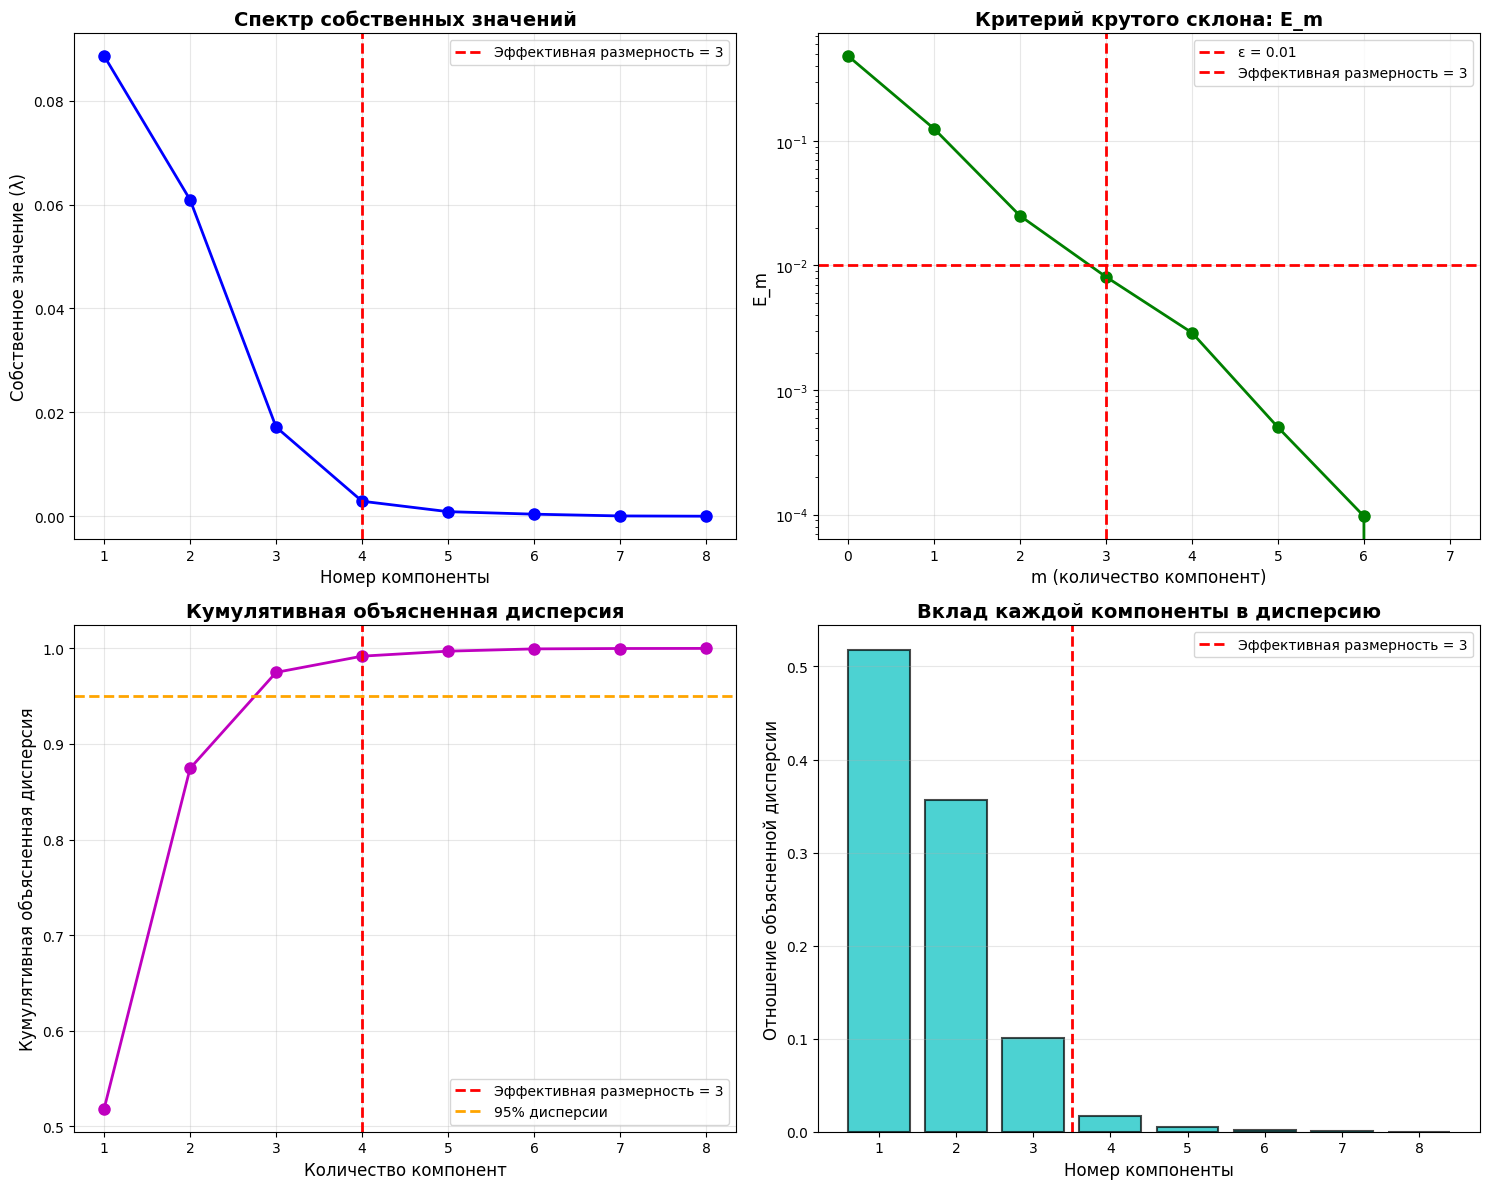


Эффективная размерность: 3
Объясненная дисперсия при m=3: 0.9919
Значение E_3 = 0.008111


In [5]:
plot_effective_dimension_analysis(eigenvalues, E_values, effective_dim, pca_svd, epsilon=epsilon)

## 5. Сравнение с эталонной реализацией (sklearn)


In [6]:
pca_sklearn, X_pca_sklearn = compare_with_sklearn(pca_svd, X_scaled, X_pca_svd)

Сравнение реализаций:

1. Главные компоненты:
   Наша реализация: (8, 8)
   sklearn: (8, 8)

2. Объясненная дисперсия:
   Наша реализация: [0.08861739 0.06091338 0.01717205 0.00290258 0.00089321]
   sklearn: [0.08861739 0.06091338 0.01717205 0.00290258 0.00089321]

3. Отношение объясненной дисперсии:
   Наша реализация: [0.5182535  0.35623448 0.10042584 0.01697492 0.00522371]
   sklearn: [0.5182535  0.35623448 0.10042584 0.01697492 0.00522371]

4. Преобразованные данные:
   Наша реализация: (20640, 8)
   sklearn: (20640, 8)


## Визуальное сравнение первых двух главных компонент

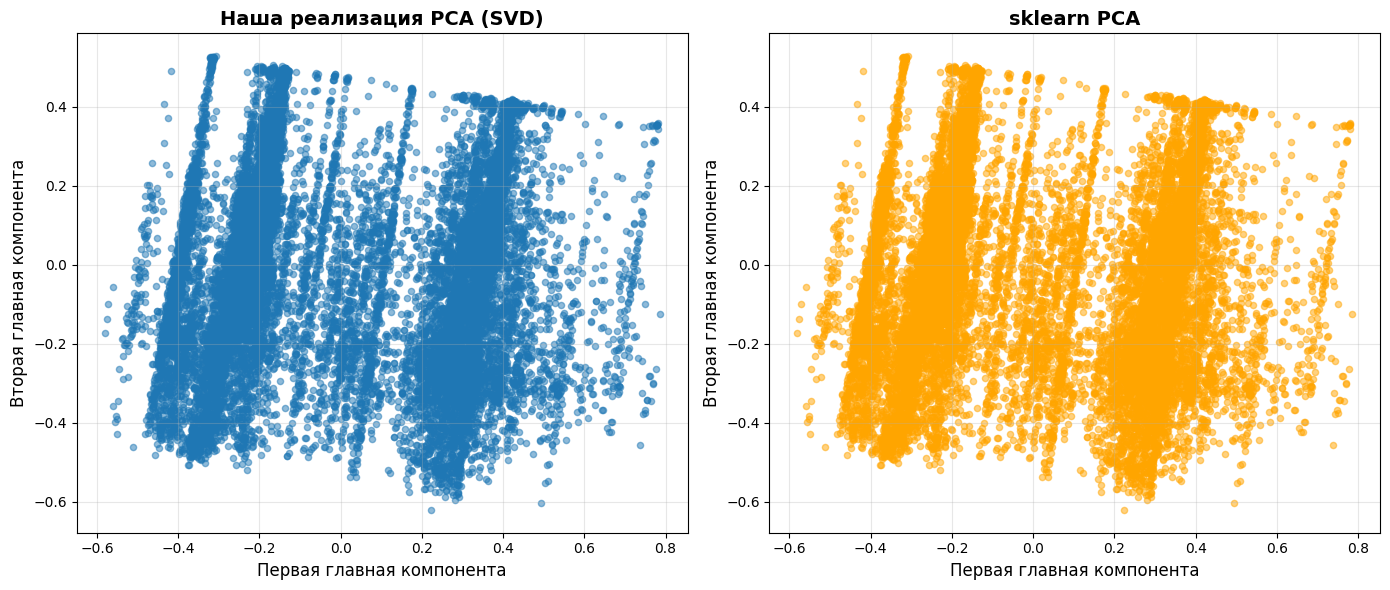

In [7]:
plot_pca_comparison(X_pca_svd, X_pca_sklearn)

## Заключение

В данной работе была реализована PCA через сингулярное разложение и определены эффективные размерности выборки. Реализация показала эквивалентность с эталонной реализацией sklearn.
